In [17]:
import matplotlib.pyplot as plt
from pydicom import dcmread
import os
import numpy as np
from pydicom.pixel_data_handlers.util import apply_modality_lut

In [18]:
def transform_to_hu(medical_image, image):
    intercept = medical_image.RescaleIntercept
    slope = medical_image.RescaleSlope
    hu_image = image * slope + intercept

    return hu_image

In [19]:
def transform_to_pixel_array(medical_image, hu_image):
    intercept = medical_image.RescaleIntercept
    slope = medical_image.RescaleSlope
    image = (hu_image - intercept)/slope
    
    return image.astype(np.int16)

In [20]:
def show_medical_image(med_img, title=""):
    plt.figure(figsize=(15, 7))
    plt.imshow(med_img, cmap='gray')
    plt.title(title)
    plt.axis('off')

In [21]:
def open_medical_image(file_path):
    medical_image = dcmread(file_path)
    pixel_array = medical_image.pixel_array
    return medical_image, pixel_array

In [22]:
def save_dicom(dicom, new_image, file_path):
    dicom.PixelData = new_image.tobytes()
    dicom.save_as(file_path)


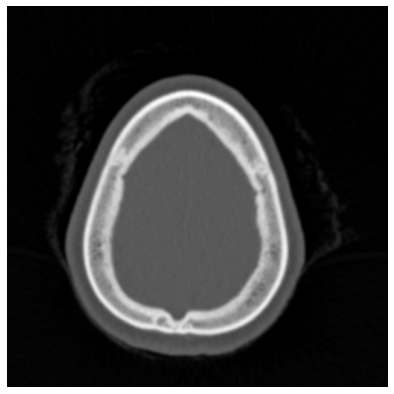

In [23]:
medical_image, pixel_array = open_medical_image("images/I1000000")
show_medical_image(pixel_array)

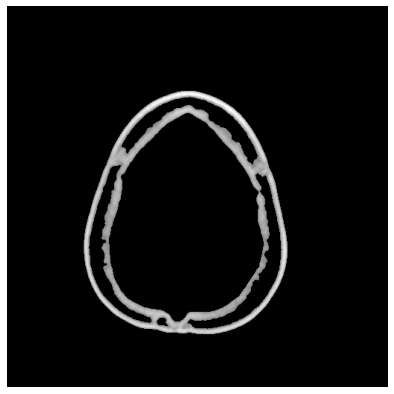

In [24]:
hu_image = transform_to_hu(medical_image, pixel_array)
hu_image[hu_image < 1000] = 0
show_medical_image(hu_image)

In [25]:
pixel_array = transform_to_pixel_array(medical_image, hu_image)
save_dicom(medical_image, pixel_array,"images/temp.dcm")

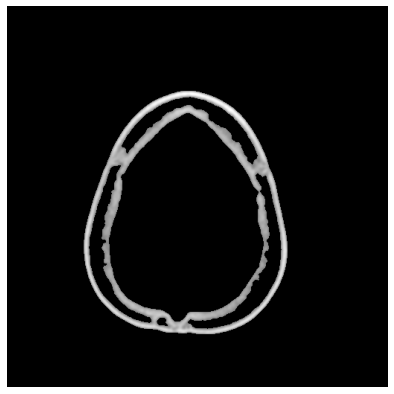

In [26]:
_, image = open_medical_image("images/temp.dcm")

show_medical_image(image)